# **Résumé du TP**


Ce premier TP de Machine Learning 1 est constitué de deux exercices. 
Le premier consiste à analyser les variables explicatives: ce que nous constatons entre le jeu de train et le jeu de test.(en se référant au notebook"regression"présenté au cours ).
Le dexième exercice à la suite du premier demande dans un premier temps d'optimiser les modèles Ridge, Lasso et ElasticNet puis dans un second temps d'étudier l'importance des variables dans chaque modèle.

Ainsi pour mener à bien ce TP je repondrai au différentes questions en suivant la chronologie prédéfinie.


## **Exercice1**

### **Packages**

!pip install ydata-profiling
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot


In [134]:
# Pour retourner un nouveau chemin pointant vers le répertoire de travail actuel
HOME_DIR = Path.cwd()

# Pour créer une variable pour le répertoire de données
DATA_DIR = Path(HOME_DIR, "data")

print(f"Répertoire de travail : {HOME_DIR} \nRépertoire des données : {DATA_DIR}")



Répertoire de travail : C:\Users\HP\Downloads 
Répertoire des données : C:\Users\HP\Downloads\data


### **Résumé Collecte des données EDA (Exploratory Data Analysis)**

In [136]:
data = pd.read_csv(Path(DATA_DIR, "billets.csv"), sep=";")
# Pour obtenir la dimension du DataFrame (nb lignes, nb colonnes)
data.shape  

(1500, 7)

In [137]:
# Pour générer des statistiques descriptives générales
data.describe(include="all")

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,NaN,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,NaN,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,NaN,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,NaN,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,NaN,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000


## **Modelisation**

In [141]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'margin_low']

In [22]:
X.head()

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54


In [23]:
y.head()

0    4.52
1    3.77
2    4.40
3    3.62
4    4.04
Name: margin_low, dtype: float64

### **Train / Test split**


In [142]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


### **Standardisation**

In [143]:
# Pour standardiser les données :

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# **Analyses**

## A faire :Analyse statistique des variables explicatives


On calcule les statistiques descriptives pour chaque variable pour les jeux de données d’entraînement et les jeux de données de test.
Puis, par comparaison nous verrons si les distributions des variables dans le jeu de test sont similaires à celles du jeu d’entraînement.

In [66]:
import pandas as pd

def summary_statistics(X_train, X_test):
    
    # Calculer les statistiques descriptives pour le jeu d'entraînement
    train_summary = pd.DataFrame(X_train).describe().T
    train_summary['median'] = pd.DataFrame(X_train).median()
    
    # Calculer les statistiques descriptives pour le jeu de test
    test_summary = pd.DataFrame(X_test).describe().T
    test_summary['median'] = pd.DataFrame(X_test).median()
    
    # Afficher les statistiques descriptives pour comparaison
    print("Résumé statistique du jeu d'entraînement :\n", train_summary)
    print("\nRésumé statistique du jeu de test :\n", test_summary)
    
    return train_summary, test_summary

In [64]:
train_summary  # Affiche le résumé des statistiques descriptives pour le jeu d d'entraînement

,count,mean,std,min,25%,50%,75%,max,median
diagonal,1024.0,171.962383,0.301231,171.05,171.7500,171.96,172.1800,172.89,171.96
height_left,1024.0,104.035996,0.300359,103.22,103.8275,104.04,104.2400,104.88,104.04
height_right,1024.0,103.921045,0.326683,102.91,103.7000,103.92,104.1600,104.95,103.92
margin_up,1024.0,3.157305,0.230871,2.56,2.9900,3.14,3.3100,3.91,3.14
length,1024.0,112.675596,0.873045,109.97,112.0450,112.95,113.3325,114.32,112.95


In [38]:
test_summary   # Affiche le résumé des statistiques descriptives pour le jeu de test 

,count,mean,std,min,25%,50%,75%,max,median
diagonal,439.0,171.951754,0.315320,171.04,171.745,171.95,172.16,173.01,171.95
height_left,439.0,104.020456,0.297897,103.14,103.825,104.03,104.23,104.83,104.03
height_right,439.0,103.922483,0.318636,103.03,103.725,103.92,104.14,104.95,103.92
margin_up,439.0,3.143235,0.232813,2.27,2.980,3.14,3.32,3.77,3.14
length,439.0,112.672802,0.874626,109.49,111.990,112.98,113.35,114.13,112.98


## **Visualisation des distributions**

Pour visualiser la répartition des valeurs de chaque variable entre les deux jeux de donnée afin de repérer des différences visuelles.

In [146]:
%matplotlib inline

In [149]:
## Résumé de la visualisation comparative des valeurs des différentes variables des deux jeux de données(jeux de données d'entraînement et de test)

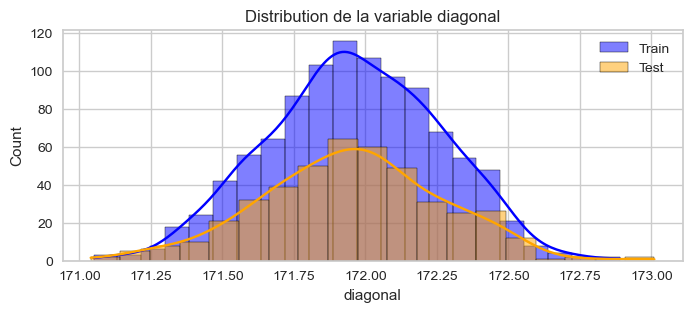

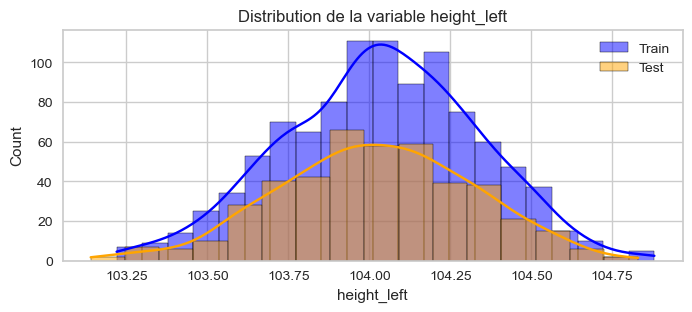

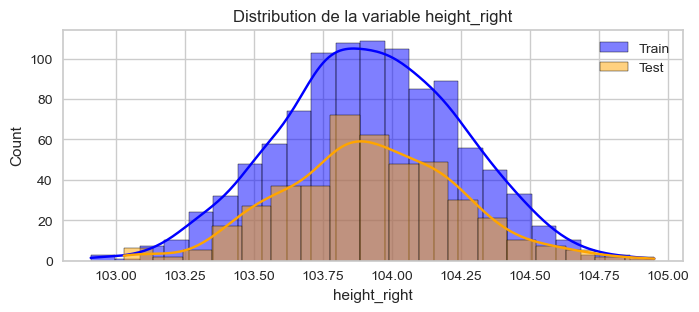

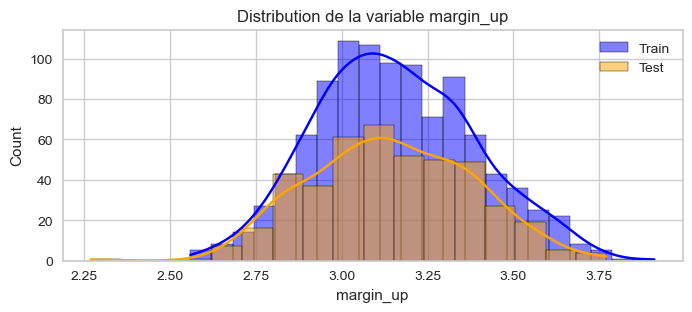

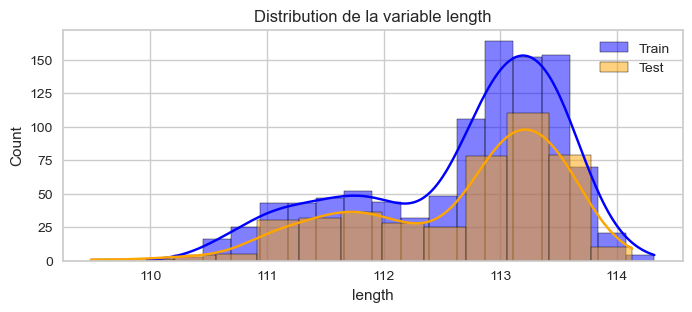

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in X_train.columns:
    plt.figure(figsize=(8, 3))
    sns.histplot(X_train[column], color="blue", label="Train", kde=True)
    sns.histplot(X_test[column], color="orange", label="Test", kde=True)
    plt.legend()
    plt.title(f'Distribution de la variable {column}')
    plt.show()

# **Résumé des analyses statistiques des variables explicatives**

En me basant sur une comparaison des valeurs dans les deux tableaux recapitulatifs des statistiques descriptives des jeux de données puis à la comparaison des différences entre les graphiques comparant les valeurs de chaque variable du jeu de donnée d'entrainement à celle du jeu de donnée test, nous pouvons relever un légère différence entre les valeus des deux jeux.
Les statistiques descriptives des jeux de train sont en majorité supérieures à celles du jeu test et les  distribution des valeurs des  jeux confirmeent ces différences
Cette légere différente mème si elle n'est pas alarmente  peut sembler petite, mais peut avoir un impact sur la prédiction sur de nouvelles données.


##  **Exercice2**

## **Partie1**

Dans cette partie,nous allons optimiser les différents modèles d'optimisation à savoir Ridge, Lasso et Elastic-Net


## **Modèle Ridge:optimisation**


L’objectif de l’optimisation est de trouver la meilleure valeur α qui réduit l’erreur de prédiction sans sur-apprendre ni sous-apprendre. 
On doit donc trouver un coefficient de régularisation adapté.

Pour ce faire, nous creerons une fonction qui optimise ce modèle( en utilisant la méthode de la validation croisée):cette fonction me retounera à la fin:     ridge_model : qui est le modèle Ridge optimisé avec la meilleure valeur d’αα.
best_alpha : qui est la meilleure valeur α trouvée par la validation croisée.
test_error : qui est l’erreur de prédiction sur le jeu de test, permettant d’évaluer les performances du modèle Ridge optimisé.

In [219]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def optimize_ridge(X_train, y_train, X_test, y_test, alpha_values=[0.01, 0.1, 1, 10, 100, 1000]):
    
    # Définir la grille de valeurs pour alpha
    param_grid = {'alpha': alpha_values}
    
    # Initialiser le modèle Ridge
    ridge_model = Ridge()
    
    # Utiliser GridSearchCV pour tester les valeurs de alpha avec validation croisée
    grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Extraire la meilleure valeur de alpha
    best_alpha = grid_search.best_params_['alpha']
    print("Meilleure valeur pour alpha:", best_alpha)
    
    # Entraîner le modèle Ridge avec la meilleure valeur de alpha
    ridge_optimized = Ridge(alpha=best_alpha)
    ridge_optimized.fit(X_train, y_train)
    
    # Calculer l'erreur de prédiction sur le jeu de test
    test_predictions = ridge_optimized.predict(X_test)
    test_error = mean_squared_error(y_test, test_predictions)
    print("Erreur sur le jeu de test:", test_error)
    
    print(ridge_optimized, best_alpha, test_error)


In [220]:
 print(ridge_optimized, best_alpha, test_error)

Ridge(alpha=10) 0.01 0.4650577199569695


## **Modèle Lasso:optimisation**


L'objectif d'optimisation du modèle de régression Lasso, est de trouver la meilleure valeur pour le paramètre de régularisation alpha, celle qui minimise l'erreur.
Pour le faire nous allons utiliser une méthode similaire à celle utilisée pour le modèle Ridge (plus haut).

In [186]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

def optimize_lasso(X_train, y_train, X_test, y_test):
    # Définir la grille de valeurs d'alpha à tester
    alphas = [0.01, 0.1, 1, 10]
    model = Lasso(max_iter=1000) 

    # Utiliser GridSearchCV pour trouver le meilleur alpha
    grid = GridSearchCV(estimator=model, param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
    grid.fit(X_train, y_train)
    
    # Récupérer le meilleur modèle et la meilleure valeur de alpha
    lasso_optimized = grid.best_estimator_
    best_alpha = grid.best_params_['alpha']
    
    # Calculer l'erreur de test
    y_pred = lasso_optimized.predict(X_test)
    test_error = mean_squared_error(y_test, y_pred)
    
    # Retourner le modèle optimisé, la meilleure valeur d'alpha, et l'erreur de test
    return lasso_optimized, best_alpha, test_error

In [187]:
lasso_optimized, best_alpha, test_error = optimize_lasso(X_train, y_train, X_test, y_test)
print("Modèle optimisé:", lasso_optimized)
print("Meilleur alpha:", best_alpha)
print("Erreur de test:", test_error)

Modèle optimisé: Lasso(alpha=0.01)
Meilleur alpha: 0.01
Erreur de test: 0.21957788360981903


## **Modèle Elastic-Net  : optimisation**


L'objectif de l'optimisation du modèle ElasticNet(qui combine le modèle de Lasso et celui de Ridge), est de  choisir les meilleures valeurs pour les deux hyperparamètres : alpha (intensité de la régularisation) et l1_ratio (qui contrôle l’équilibre entre les régularisations Lasso et Ridge) afin d'améliorer ses performances prédictives.

In [209]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

def optimize_elasticnet(X_train, y_train, X_test, y_test):
    # Définir la grille de valeurs d'alpha et l1_ratio à tester
    alphas = [0.01, 0.1, 1, 10]  # Valeurs possibles pour alpha
    l1_ratios = [0.1, 0.3, 0.5, 0.7, 1.0]  # Valeurs possibles pour l1_ratio (de Lasso à Ridge)
    
    # Définir le modèle ElasticNet
    model = ElasticNet(max_iter=1000)  
    
    # Utiliser GridSearchCV pour trouver la meilleure combinaison de alpha et l1_ratio
    param_grid = {
        'alpha': alphas,  
        'l1_ratio': l1_ratios  
    }
    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid.fit(X_train, y_train)
    # Récupérer le meilleur modèle et les meilleurs paramètres
    elasticnet_optimized = grid.best_estimator_
    best_alpha = grid.best_params_['alpha']
    best_l1_ratio = grid.best_params_['l1_ratio']
    
    # Calculer l'erreur de test (RMSE - racine de l'erreur quadratique moyenne)
    y_pred = elasticnet_optimized.predict(X_test)
    test_error = mean_squared_error(y_test, y_pred, squared=False)  # RMSE

    # Retourner le modèle optimisé, les meilleurs paramètres, et l'erreur de test
    return elasticnet_optimized, best_alpha, best_l1_ratio, test_error

# Exemple d'utilisation de la fonction
elasticnet_optimized, best_alpha, best_l1_ratio, test_error = optimize_elasticnet(X_train, y_train, X_test, y_test)

# Affichage des résultats
print("Modèle optimisé:", elasticnet_optimized)
print("Meilleur alpha:", best_alpha)
print("Meilleur l1_ratio:", best_l1_ratio)
print("Erreur de test (RMSE):", test_error)

Modèle optimisé: ElasticNet(alpha=0.01, l1_ratio=0.1)
Meilleur alpha: 0.01
Meilleur l1_ratio: 0.1
Erreur de test (RMSE): 0.4650577199569695


## **Résumé de la partie 1**

Suite à l'optimisation des différents modèles à savoir Ridge, Lasso et Elastic-Net effectuées ci dessous : il ressort que les erreurs de prédictions du modèle Ridge optimisé est le plus faible que celles deux autres modèles optimisés(Lasso et Elastic-Net).
Par conséquent, le modèle de Ridge optimisée prédit au mieux Y .


## **Partie 2**

Dans cette partie, nous allons étudier l'importance des variables dans chaque modèle à savoir Ridge, Lasso et Elastic-Net.


### **Pour le modèle Ridge**

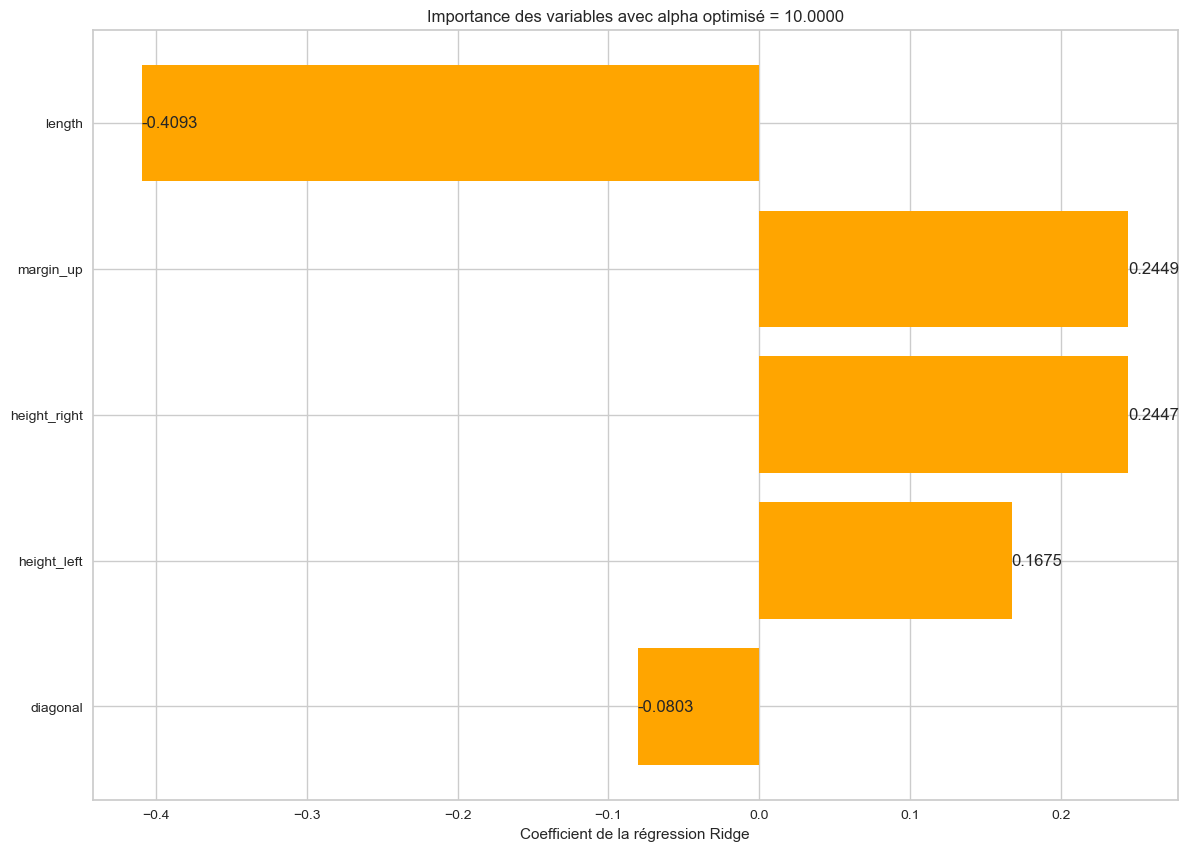

In [232]:
# Entraîner le modèle Ridge avec la meilleure valeur de alpha
best_alpha=10
ridge_best = linear_model.Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

# Récupérer les coefficients des variables
coefficients = ridge_best.coef_

#  liste des noms des variables
variable_names = X_train.columns if hasattr(X_train, 'columns') else [f'Variable {i+1}' for i in range(len(coefficients))]

# Trier les coefficients en valeur absolue pour afficher les plus importantes
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_variable_names = [variable_names[i] for i in sorted_indices]

# graphique des importances des variables avec les valeurs
plt.figure(figsize=(14, 10))
bars = plt.barh(sorted_variable_names, sorted_coefficients, color='orange')
plt.xlabel('Coefficient de la régression Ridge')
plt.title(f'Importance des variables avec alpha optimisé = {best_alpha:.4f}')
plt.grid(True)
plt.gca().invert_yaxis()  # Inverser l'axe pour avoir les variables les plus importantes en haut

# Ajouter des annotations pour afficher la valeur de chaque coefficient sur le graphique
for bar, coeff in zip(bars, sorted_coefficients):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{coeff:.4f}',
             ha='left', va='center')

plt.show()

###  **Importance des variables dans le modèle Ridge**


Pour Ridge, qui utilise une régularisation L2, les coefficients seront plus petits, mais ils ne seront pas exactement nuls. Cela signifie que toutes les variables restent dans le modèle, mais certaines auront un impact plus faible.Ridge réduit les coefficients, mais ils ne seront jamais exactement zéro. Il garde donc toutes les variables dans le modèle, mais certaines auront une influence plus faible.
De ce fait la variable diagonale a une influence moindre par rapport aux autres variables.Par contre la variable length influence le plus.

## **Pour le modèle Lasso**

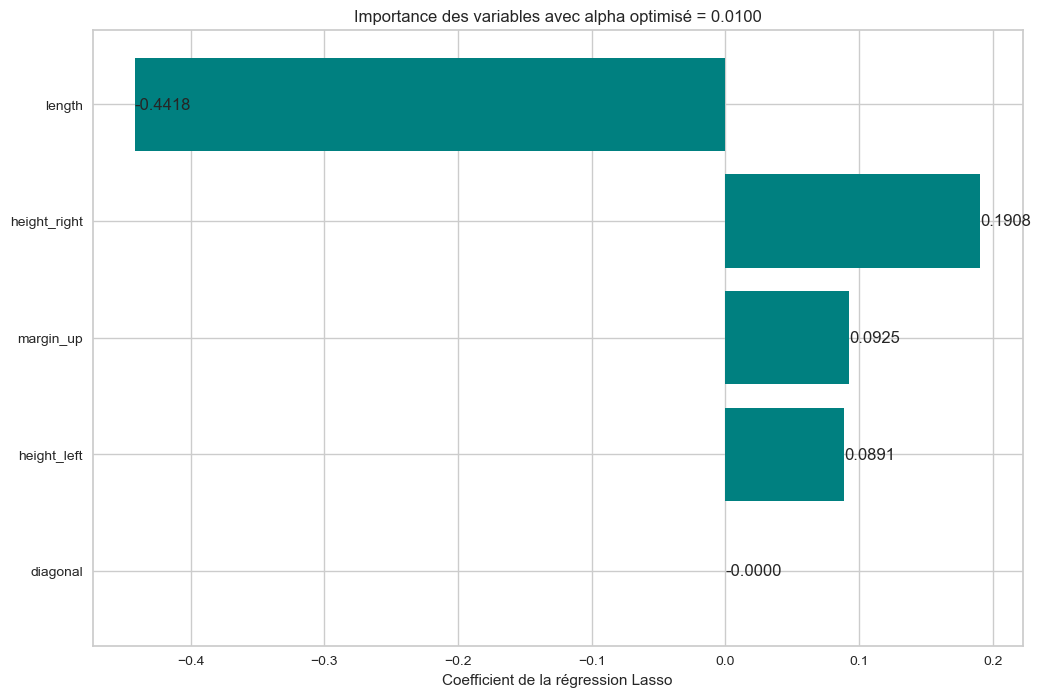

In [228]:
# Entraîner le modèle Lasso avec la meilleure valeur de alpha (best_alpha)
best_alpha_lasso=0.01
lasso_best = linear_model.Lasso(fit_intercept=True, alpha=best_alpha_lasso,)
lasso_best.fit(X_train, y_train)

# Récupérer les coefficients des variables
coefficients = lasso_best.coef_


# Nom des variables
variable_names = X_train.columns if hasattr(X_train, 'columns') else [f'Variable {i+1}' for i in range(len(coefficients))]

# Trier les coefficients en valeur absolue pour afficher les plus importantes
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_variable_names = [variable_names[i] for i in sorted_indices]

# graphique des importances des variables
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_variable_names, sorted_coefficients, color='teal')
plt.xlabel('Coefficient de la régression Lasso')
plt.title(f'Importance des variables avec alpha optimisé = {best_alpha_lasso:.4f}')
plt.grid(True)
plt.gca().invert_yaxis()  # Inverser l'axe pour avoir les variables les plus importantes en haut
# Ajouter des annotations pour afficher la valeur de chaque coefficient sur le graphique
for bar, coeff in zip(bars, sorted_coefficients):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{coeff:.4f}',
             ha='left', va='center')

plt.show()

###  **Importance des variables dans le modèle Lasso**


Pour Lasso, qui utilise une régularisation L1, certains coefficients seront exactement nuls, ce qui signifie que ces variables ont été ignorées par le modèle. Lasso effectue une sélection de variables en réduisant à zéro les moins pertinentes.Lasso sélectionne les variables les plus pertinentes en les poussant à zéro. Les coefficients qui sont exactement zéro indiquent des variables inutilisées.De cet fait les variables ,,,,,, sont inutilisées. Ici la variable diagonale n'explique pas Y et n'est donc pas utilisée pour expliquer y.Ici c'est la variable leigth_left qui explique le moins Y à l'opposé de la variable length qui explique le mieux y

### **Pour le modèle Elastic-Net**

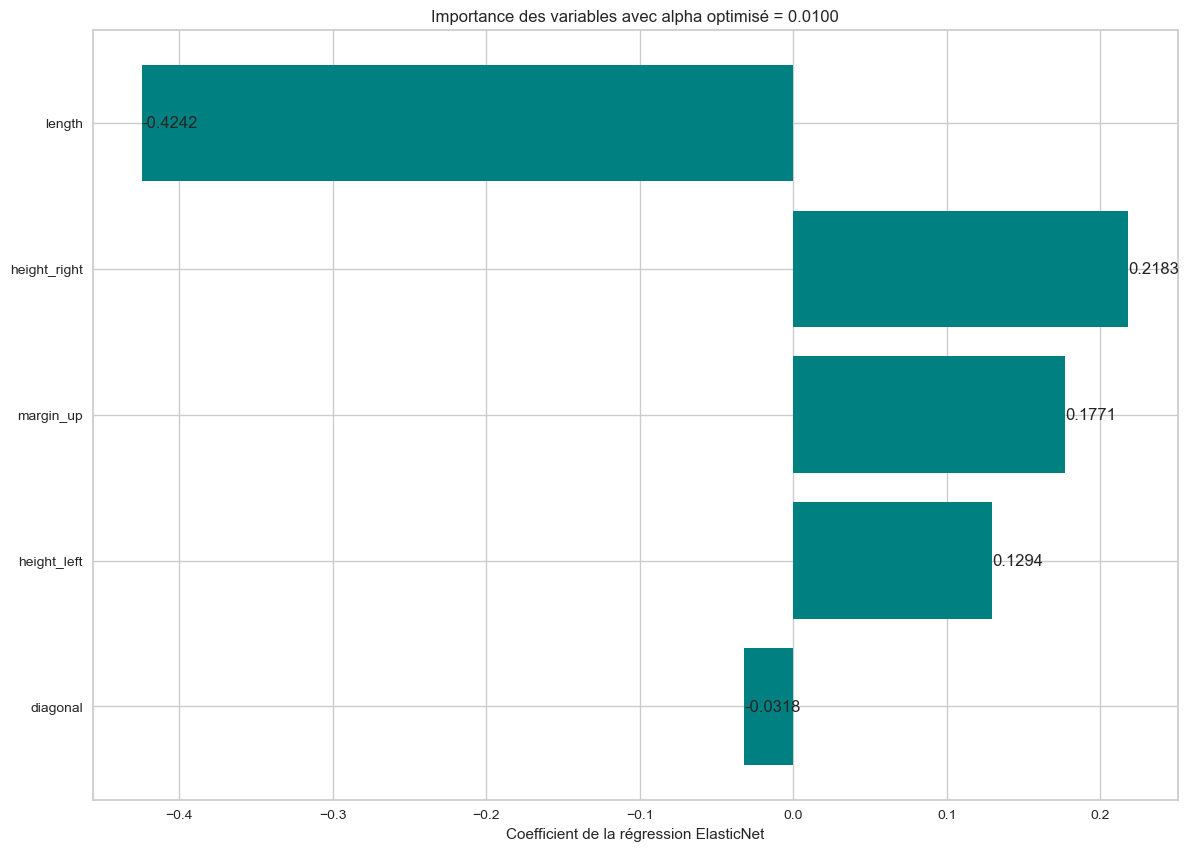

In [230]:
# Entraîner le modèle ElasticNet avec la meilleure valeur de alpha (best_alpha)
best_alpha=0.01
elastic = linear_model.ElasticNet(fit_intercept=True, alpha=best_alpha, l1_ratio=0.5)
elastic.fit(X_train, y_train)  # Correction ici, utilisation de elastic au lieu de elastic_best

# Récupérer les coefficients des variables
coefficients = elastic.coef_

# Nom des variables
variable_names = X_train.columns if hasattr(X_train, 'columns') else [f'Variable {i+1}' for i in range(len(coefficients))]

# Trier les coefficients en valeur absolue pour afficher les plus importantes
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_variable_names = [variable_names[i] for i in sorted_indices]

# Graphique des importances des variables avec les annotations des valeurs
plt.figure(figsize=(14, 10))
bars = plt.barh(sorted_variable_names, sorted_coefficients, color='teal')
plt.xlabel('Coefficient de la régression ElasticNet')
plt.title(f'Importance des variables avec alpha optimisé = {best_alpha:.4f}')
plt.grid(True)
plt.gca().invert_yaxis()  # Inverser l'axe pour avoir les variables les plus importantes en haut

# Ajouter des annotations pour afficher la valeur de chaque coefficient sur le graphique
for bar, coeff in zip(bars, sorted_coefficients):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{coeff:.4f}',  # Afficher la valeur avec 4 chiffres après la virgule
             ha='left', va='center')

plt.show()

### **Importance des variables dans le modèle Elastic-Net**

Elastic-Net combine les approches de Lasso et Ridge, offrant un compromis entre sélection de variables et réduction des coefficients.
Ici c'est la variable diagonale qui explique le moins Y à l'opposé de la variable length

## **Résumé de la partie 2**

Après avoir étudier l'importance des variables dans chaque modèle à savoir Ridge, Lasso et Elastic-Net; il ressort que : la variable length explique le mieux y (margin_low).
